In [1]:
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:

df = pd.read_csv('city_temperature.csv')
data = df['AvgTemperature'].values.reshape(-1, 1)


C:\Users\ASLAM\AppData\Local\Temp\ipykernel_24836\2119846954.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('city_temperature.csv')


In [3]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [4]:

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [ ]:

X, y = create_sequences(scaled_data, 20)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:

lstm_model = Sequential([
    LSTM(64, input_shape=(20, 1)),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(128).prefetch(tf.data.AUTOTUNE)
val_data = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(128)

lstm_history = lstm_model.fit(train_data, epochs=20, validation_data=val_data)



Epoch 1/20

18165/18165 [==============================] - 251s 14ms/step - loss: 0.3420 - val_loss: 0.1038
Epoch 2/20
18165/18165 [==============================] - 251s 14ms/step - loss: 0.3230 - val_loss: 0.1008
Epoch 3/20
18165/18165 [==============================] - 254s 14ms/step - loss: 0.3185 - val_loss: 0.0980
Epoch 4/20
18165/18165 [==============================] - 252s 14ms/step - loss: 0.3160 - val_loss: 0.0978
Epoch 5/20
18165/18165 [==============================] - 266s 15ms/step - loss: 0.3152 - val_loss: 0.0973
Epoch 6/20
18165/18165 [==============================] - 294s 16ms/step - loss: 0.3144 - val_loss: 0.0969
Epoch 7/20
18165/18165 [==============================] - 283s 16ms/step - loss: 0.3140 - val_loss: 0.0967
Epoch 8/20
18165/18165 [==============================] - 240s 13ms/step - loss: 0.3135 - val_loss: 0.0967
Epoch 9/20
18165/18165 [==============================] - 267s 15ms/step - loss: 0.3132 - val_loss: 0.0989
Epoch 10/20
18165/18165 [=========

In [ ]:

RNN_model = Sequential([
    SimpleRNN(32, input_shape=(20, 1)),  
    Dense(1)
])

RNN_model.compile(optimizer='adam', loss='mse')
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(128).prefetch(tf.data.AUTOTUNE)
val_data = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(128)

RNN_history = lstm_model.fit(train_data, epochs=20, validation_data=val_data)


Epoch 1/20
18165/18165 [==============================] - 362s 20ms/step - loss: 0.3095 - val_loss: 0.0964
Epoch 2/20
18165/18165 [==============================] - 528s 29ms/step - loss: 0.3097 - val_loss: 0.0959
Epoch 3/20
18165/18165 [==============================] - 373s 21ms/step - loss: 0.3090 - val_loss: 0.0955
Epoch 4/20
18165/18165 [==============================] - 339s 19ms/step - loss: 0.3095 - val_loss: 0.0960
Epoch 5/20
18165/18165 [==============================] - 239s 13ms/step - loss: 0.3103 - val_loss: 0.0958
Epoch 6/20
18165/18165 [==============================] - 250s 14ms/step - loss: 0.3103 - val_loss: 0.0953
Epoch 7/20
18165/18165 [==============================] - 248s 14ms/step - loss: 0.3094 - val_loss: 0.0955
Epoch 8/20
18165/18165 [==============================] - 250s 14ms/step - loss: 0.3087 - val_loss: 0.0955
Epoch 9/20
18165/18165 [==============================] - 251s 14ms/step - loss: 0.3087 - val_loss: 0.0956
Epoch 10/20
18165/18165 [============

In [ ]:

lstm_predictions = scaler.inverse_transform(lstm_model.predict(X_test))
RNN_predictions = scaler.inverse_transform(RNN_model.predict(X_test))
y_test_actual = scaler.inverse_transform(y_test)


18165/18165 [==============================] - 31s 2ms/step


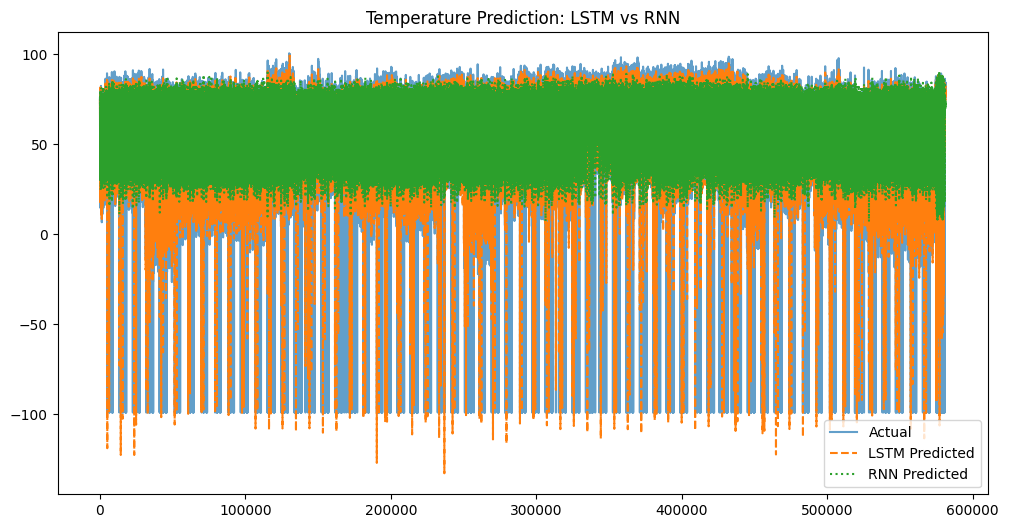

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual', alpha=0.7)
plt.plot(lstm_predictions, label='LSTM Predicted', linestyle='--')
plt.plot(RNN_predictions, label='RNN Predicted', linestyle=':')
plt.title("Temperature Prediction: LSTM vs RNN")
plt.legend()
plt.show()


In [ ]:

mse_lstm = np.mean((y_test_actual - lstm_predictions)**2)
mse_rnn = np.mean((y_test_actual - RNN_predictions)**2)


In [11]:

print("\nMSE Comparison:")
print(f"LSTM MSE: {mse_lstm:.4f}")
print(f"RNN MSE: {mse_rnn:.4f}")



MSE Comparison:
LSTM MSE: 99.0630
RNN MSE: 216.3807
